In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('Clhousing.csv')

In [3]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df.shape

(20640, 10)

In [5]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

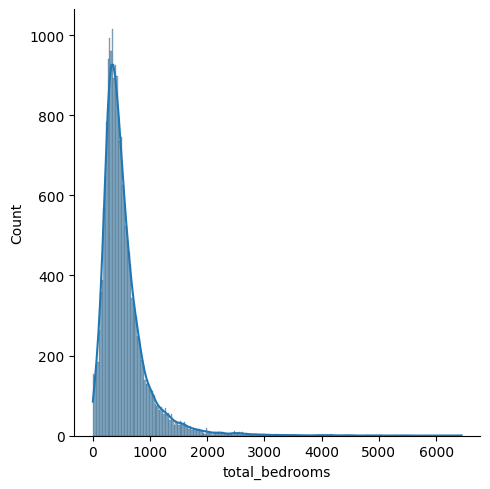

In [8]:
import seaborn as sns 
sns.displot(x='total_bedrooms',data=df, kde=True)

In [9]:

df['total_bedrooms'].skew()

np.float64(3.459546331523342)

In [10]:
import numpy as np  # Ensure the library name is correct

df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_9128\2667474860.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [11]:
df['total_bedrooms'].isnull().sum()

np.int64(0)

In [12]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [13]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [14]:
encoded_df = pd.get_dummies(df['ocean_proximity'], prefix='ocean', dtype=int)
df = pd.concat([df, encoded_df], axis=1)


In [15]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ocean_<1H OCEAN  ocean_INLAND  ocean_ISLAND  ocean_NEAR BAY  \
0                0             0             0               1   
1                0             0             0               1   
2                0             0             0               1   
3                0             0             0               1   
4                0             0             0               1   

   ocean_NEAR OCEAN  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [16]:
# Drop the 'ocean_proximity' column from the DataFrame
df.drop(columns=['ocean_proximity'], inplace=True)


In [17]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_<1H OCEAN  \
0       322.0       126.0         8.3252            452600.0                0   
1      2401.0      1138.0         8.3014            358500.0                0   
2       496.0       177.0         7.2574            352100.0                0   
3       558.0       219.0         5.6431            341300.0                0   
4       565.0       259.0         3.8462            342200.0                0   

   ocean_INLAND  ocean_ISLAND  ocean_NEAR BAY  ocean_NEAR OCEAN  
0             0             0               1                 0  
1             0             0               1                 0  
2             0             0               1                 0  
3             0             0               1                 0  
4             0             0               1                 0

In [18]:
df.skew()

longitude             -0.297801
latitude               0.465953
housing_median_age     0.060331
total_rooms            4.147343
total_bedrooms         3.481141
population             4.935858
households             3.410438
median_income          1.646657
median_house_value     0.977763
ocean_<1H OCEAN        0.230999
ocean_INLAND           0.784682
ocean_ISLAND          64.230833
ocean_NEAR BAY         2.477658
ocean_NEAR OCEAN       2.216702
dtype: float64

In [19]:
import numpy as np

# Columns with high skewness, apply log transformation
skewed_columns = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Apply log1p transformation
for column in skewed_columns:
    df[column] = np.log(df[column]+1)




In [20]:
df.skew()

longitude             -0.297801
latitude               0.465953
housing_median_age     0.060331
total_rooms           -1.075533
total_bedrooms        -0.998768
population            -1.044087
households            -1.051607
median_income          0.226083
median_house_value     0.977763
ocean_<1H OCEAN        0.230999
ocean_INLAND           0.784682
ocean_ISLAND          64.230833
ocean_NEAR BAY         2.477658
ocean_NEAR OCEAN       2.216702
dtype: float64

In [21]:
from scipy import stats

# Apply Box-Cox transformation (only for positive values)
df['total_rooms'], _ = stats.boxcox(df['total_rooms'] + 1)  # Adding 1 to avoid zeros
df['total_bedrooms'], _ = stats.boxcox(df['total_bedrooms'] + 1)
df['population'], _ = stats.boxcox(df['population'] + 1)
df['households'], _ = stats.boxcox(df['households'] + 1)




In [22]:
df.skew()

longitude             -0.297801
latitude               0.465953
housing_median_age     0.060331
total_rooms            0.163101
total_bedrooms         0.154594
population             0.144822
households             0.146945
median_income          0.226083
median_house_value     0.977763
ocean_<1H OCEAN        0.230999
ocean_INLAND           0.784682
ocean_ISLAND          64.230833
ocean_NEAR BAY         2.477658
ocean_NEAR OCEAN       2.216702
dtype: float64

In [23]:


from scipy.stats import zscore

# Specify the columns for outlier detection
columns_to_check = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 
                    'population', 'households', 'median_income', 'median_house_value']

# Apply Z-score only to the selected columns
z_scores = df[columns_to_check].apply(zscore)

# Define the threshold for outlier detection
threshold = 3

# Identify rows with outliers in the selected columns
outliers = (z_scores.abs() > threshold).any(axis=1)

# Display rows with outliers
outlier_rows = df[outliers]
print("Outlier Rows:")
outlier_rows


Outlier Rows:


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
73       -122.29     37.81                46.0    13.292074        4.072990   
88       -122.27     37.80                10.0    51.632938       20.036922   
92       -122.28     37.80                52.0    49.313744       16.982150   
95       -122.26     37.80                36.0   237.249864       96.546927   
283      -122.16     37.79                22.0   305.907512       91.349381   
...          ...       ...                 ...          ...             ...   
20502    -118.68     34.33                45.0    55.450628       15.011735   
20530    -121.76     38.57                11.0   319.341130      102.035081   
20563    -121.75     38.67                 9.0   301.167835       98.327563   
20625    -121.52     39.12                37.0    50.874925       11.866959   
20629    -121.39     39.12                28.0   285.498842       88.727010   

       population  households  median_income  median_house_value  \
73      17.419966    7.024077       0.405398             67500.0   
88      54.211538   22.123224       0.679150            137500.0   
92      66.260795   20.468168       0.559616            162500.0   
95     197.493982  116.786598       1.101807            130000.0   
283    220.769020  110.991492       1.943751            371000.0   
...           ...         ...            ...                 ...   
20502   39.277269   17.875498       1.381809            325000.0   
20530  253.573786  125.584094       1.419995            201800.0   
20563  242.444965  117.316559       1.417066            132500.0   
20625   23.968613   11.719195       1.634131             72000.0   
20629  243.217233  108.310982       1.129562            108300.0   

       ocean_<1H OCEAN  ocean_INLAND  ocean_ISLAND  ocean_NEAR BAY  \
73                   0             0             0               1   
88                   0             0             0               1   
92                   0             0             0               1   
95                   0             0             0               1   
283                  0             0             0               1   
...                ...           ...           ...             ...   
20502                1             0             0               0   
20530                0             1             0               0   
20563                0             1             0               0   
20625                0             1             0               0   
20629                0             1             0               0   

       ocean_NEAR OCEAN  
73                    0  
88                    0  
92                    0  
95                    0  
283                   0  
...                 ...  
20502                 0  
20530                 0  
20563                 0  
20625                 0  
20629                 0  

[511 rows x 14 columns]

In [24]:
# Remove outliers from the original DataFrame
df_cleaned = df[~outliers]



In [25]:
df_cleaned.shape

(20129, 14)

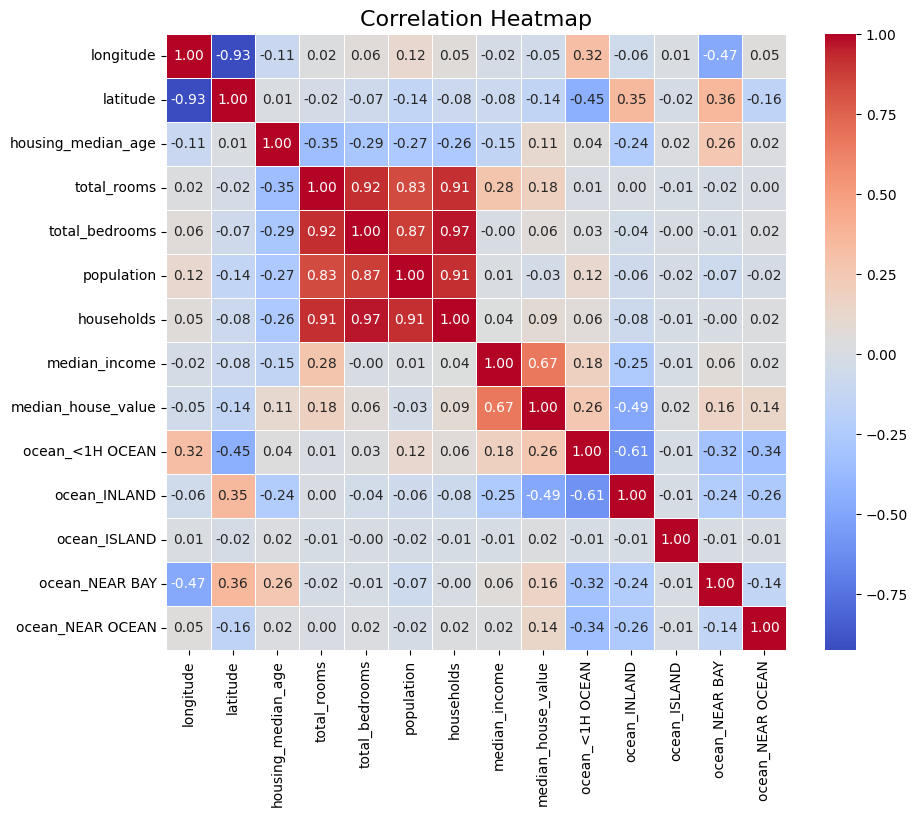

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()


In [27]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Get the correlation with respect to 'median_house_value'
correlation_with_median_house_value = correlation_matrix['median_house_value']

# Print the correlation values
print("Correlation with respect to 'median_house_value':")
print(correlation_with_median_house_value)


Correlation with respect to 'median_house_value':
longitude            -0.047182
latitude             -0.143952
housing_median_age    0.106983
total_rooms           0.181059
total_bedrooms        0.064480
population           -0.031386
households            0.086356
median_income         0.665375
median_house_value    1.000000
ocean_<1H OCEAN       0.257118
ocean_INLAND         -0.487875
ocean_ISLAND          0.024205
ocean_NEAR BAY        0.162785
ocean_NEAR OCEAN      0.141476
Name: median_house_value, dtype: float64


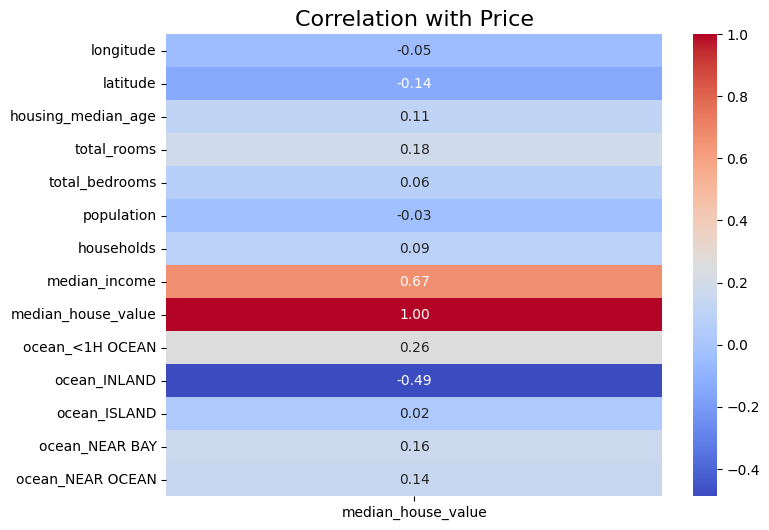

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
# Focus on correlations with 'price'
price_correlation = correlation_matrix[['median_house_value']]

# Create a heatmap for 'price' correlations
plt.figure(figsize=(8, 6))
sns.heatmap(price_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add labels and title
plt.title("Correlation with Price", fontsize=16)
plt.show()


In [29]:
df_cleaned.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0   129.850970       34.252611   
1    -122.22     37.86                21.0   258.390439       75.686464   
2    -122.24     37.85                52.0   156.108233       40.286167   
3    -122.25     37.85                52.0   148.543313       43.856095   
4    -122.25     37.85                52.0   161.817378       46.938712   

   population  households  median_income  median_house_value  ocean_<1H OCEAN  \
0   83.372691   39.907663       2.232720            452600.0                0   
1  175.566592   93.200426       2.230165            358500.0                0   
2   99.534725   46.357295       2.111110            352100.0                0   
3  104.270234   50.712593       1.893579            341300.0                0   
4  104.779904   54.318782       1.578195            342200.0                0   

   ocean_INLAND  ocean_ISLAND  ocean_NEAR BAY  ocean_NEAR OCEAN  
0             0             0               1                 0  
1             0             0               1                 0  
2             0             0               1                 0  
3             0             0               1                 0  
4             0             0               1                 0

In [30]:
df_cleaned.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0   129.850970       34.252611   
1    -122.22     37.86                21.0   258.390439       75.686464   
2    -122.24     37.85                52.0   156.108233       40.286167   
3    -122.25     37.85                52.0   148.543313       43.856095   
4    -122.25     37.85                52.0   161.817378       46.938712   

   population  households  median_income  median_house_value  ocean_<1H OCEAN  \
0   83.372691   39.907663       2.232720            452600.0                0   
1  175.566592   93.200426       2.230165            358500.0                0   
2   99.534725   46.357295       2.111110            352100.0                0   
3  104.270234   50.712593       1.893579            341300.0                0   
4  104.779904   54.318782       1.578195            342200.0                0   

   ocean_INLAND  ocean_ISLAND  ocean_NEAR BAY  ocean_NEAR OCEAN  
0             0             0               1                 0  
1             0             0               1                 0  
2             0             0               1                 0  
3             0             0               1                 0  
4             0             0               1                 0

In [31]:
# Define the independent features (X) and target (y)
X = df_cleaned.drop(columns=['median_house_value'])  # Drop the 'price' column
y = df_cleaned['median_house_value']  # 'price' is the target variable


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [33]:
X_test.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
10535    -117.70     33.50                 4.0   183.221810       55.712818   
6895     -118.11     34.04                28.0   215.783391       65.063674   
15728    -122.45     37.78                52.0   174.563220       55.397372   
8493     -118.30     33.90                13.0   185.853973       63.940010   
10425    -117.63     33.47                 4.0   172.694150       46.938712   

       population  households  median_income  ocean_<1H OCEAN  ocean_INLAND  \
10535  121.529360   64.213063       1.882164                1             0   
6895   172.219845   78.870257       1.831717                1             0   
15728  170.550392   65.477737       1.540452                0             0   
8493   164.601679   75.579057       1.375208                1             0   
10425  119.939758   55.319138       2.151902                0             0   

       ocean_ISLAND  ocean_NEAR BAY  ocean_NEAR OCEAN  
10535             0               0                 0  
6895              0               0                 0  
15728             0               1                 0  
8493              0               0                 0  
10425             0               0                 1

In [34]:
y_test.head()

10535    245400.0
6895     258000.0
15728    418400.0
8493     173600.0
10425    310800.0
Name: median_house_value, dtype: float64

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train, y_train)

LinearRegression()

In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions (no log transformation here)
y_pred = model.predict(X_test)

# Evaluate performance in the original scale (no need for np.exp here)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Original Scale): {mse}")
print(f"R-squared (Original Scale): {r2}")


Mean Squared Error (Original Scale): 4703914648.908781
R-squared (Original Scale): 0.6469852055232327


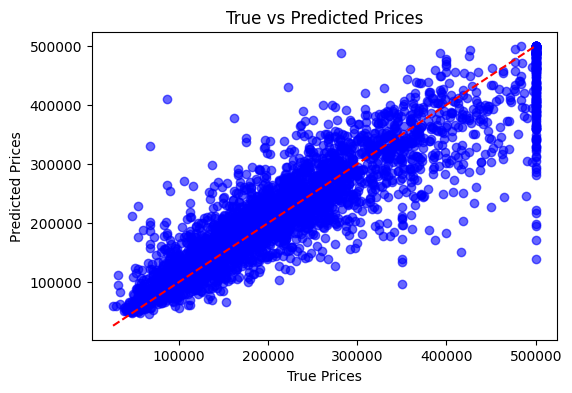

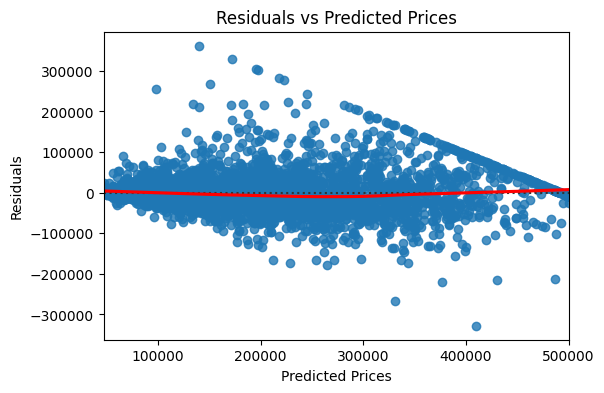

In [39]:
# Scatter plot of true vs predicted prices
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()

# Residuals plot (difference between actual and predicted prices)
plt.figure(figsize=(6, 4))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()


In [40]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)  # y_train is on the original scale

# Make predictions in the original scale
y_pred = rf_regressor.predict(X_test)

# Evaluate the model in the original scale
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (Original Scale):", mse)
print("R-squared (Original Scale):", r2)


Mean Squared Error (Original Scale): 2275018528.92343
R-squared (Original Scale): 0.8292666303787953


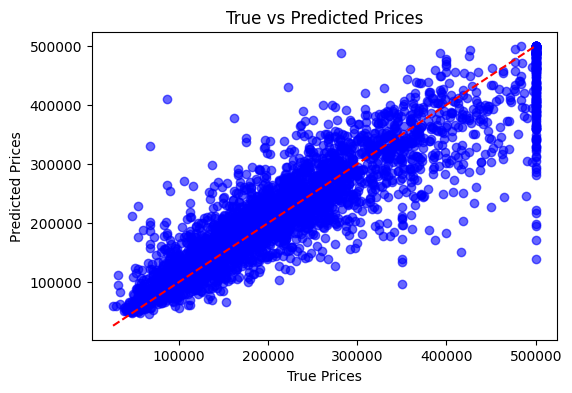

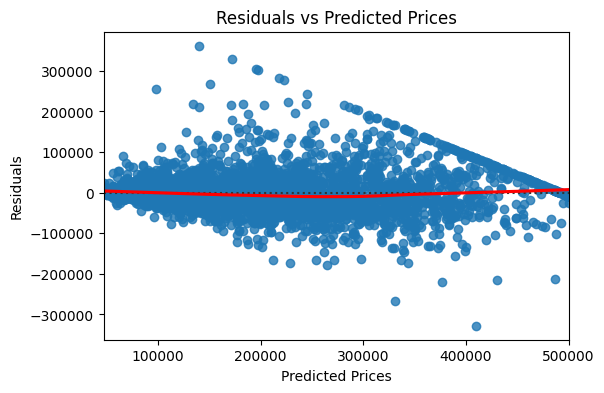

In [41]:
# Scatter plot of true vs predicted prices
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()

# Residuals plot (difference between actual and predicted prices)
plt.figure(figsize=(6, 4))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()


In [179]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# If X_train and y_train are already NumPy arrays, no need to convert them.
# Ensure X_train, y_train, X_test, y_test are in NumPy array format (no need for .to_numpy() if already in numpy format)
X_train = np.array(X_train)  # Make sure X_train is a NumPy array (if it's a DataFrame, convert it)
y_train = np.array(y_train)  # Make sure y_train is a NumPy array (if it's a Series, convert it)
X_test = np.array(X_test)    # Ensure X_test is in NumPy array format
y_test = np.array(y_test)    # Ensure y_test is in NumPy array format

# Initialize and train the XGBoost model
xgb_regressor = XGBRegressor(random_state=42, tree_method="hist")
xgb_regressor.fit(X_train, y_train)  # y_train is on the original scale

# Make predictions
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (Original Scale):", mse)
print("R-squared (Original Scale):", r2)


Mean Squared Error (Original Scale): 2107059283.5820284
R-squared (Original Scale): 0.8418714718566105


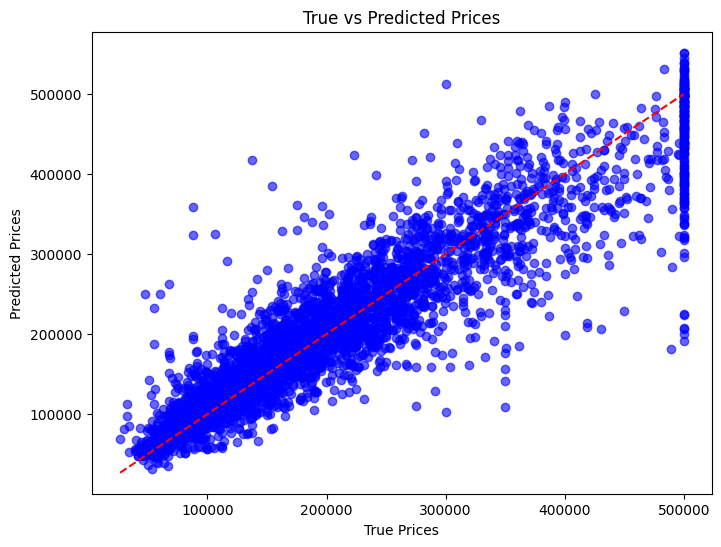

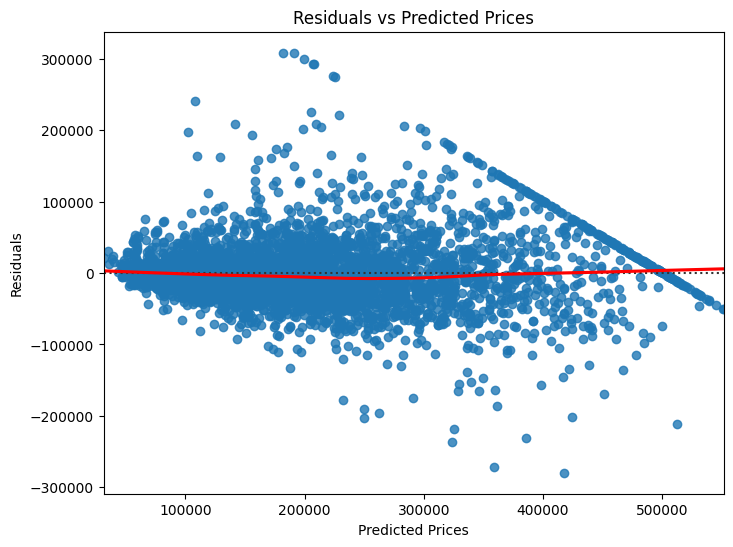

In [97]:
# Scatter plot of true vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()

# Residuals plot (difference between actual and predicted prices)
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()


In [180]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Convert data to NumPy arrays if not already
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42, tree_method="hist")

# Fit the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict using each model
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluate each model
lr_mse = mean_squared_error(y_test, lr_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# Print results
print("Model Performance Comparison:")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R²: {lr_r2:.2f}")
print(f"Random Forest - MSE: {rf_mse:.2f}, R²: {rf_r2:.2f}")
print(f"XGBoost - MSE: {xgb_mse:.2f}, R²: {xgb_r2:.2f}")


Model Performance Comparison:
Linear Regression - MSE: 4703914648.91, R²: 0.65
Random Forest - MSE: 2275018528.92, R²: 0.83
XGBoost - MSE: 2107059283.58, R²: 0.84
